In [3]:
# imports here
import numpy as np
import matplotlib.pyplot as plt
import time
from copy import deepcopy


ModuleNotFoundError: No module named 'numpy'

In [4]:
# Test Function
def sphere_function(x):
    ##return sum((x**2 - 2*x - 4) ** 2)
    return sum(x**2)

In [5]:
# Problem to be defined here as a class (or struct)

class problem:
    
    def __init__(self):
    # Cost function
        self.cost_function = sphere_function
    # number of genes (variables) in an individial
        self.number_of_genes = 5

    #  Max gene value
        self.maximum_value = 10
    # Min Gene Value
        self.minimum_value = -10


In [6]:
#Genetic Algorithm Parameters here as a class or struct
class parameters():
    def __init__(self):
        

# Number of iterations of genetic algorithm
        self.number_of_iterations = 100
# Number of individuals in Population 
        self.number_in_population = 50
    
# Rate of new children pre iteration
        self.child_rate = 1
# Number of children 
        self.number_of_children = self.number_in_population * self.child_rate
# Exploration Rate (Gamma)
        self.explore_rate = 0.3
    
# Mutation Rate (Probability that a given gene will be mutated)
        self.mutation_rate = 0.2
# Mutation Range (Determines the amount of change of an individual gene)
        self.mutation_range = 0.2


    def to_String(self):
        return ("Population: {}  Child Rate: {}  Explore Rate: {}  Mutation Rate: {}  Mutation Range: {}"
                .format(self.number_in_population, self.child_rate, self.explore_rate, self.mutation_rate, self.mutation_range))



In [7]:
# Structure for an individual of the population as a class or struct
class individual:
    

# Genotype or Chromosone
    chromosone = None
# Cost for the individual
    cost = 0
# Constructor(s)

    # if problem is passed as parameter to constructor, a random individual is generated
    #   https://docs.python.org/3/glossary.html#term-argument
    def __init__(self, problem = None):
        
        if problem is not None:
            self.chromosone = np.random.uniform(problem.minimum_value,problem.maximum_value,problem.number_of_genes)
            self.cost = problem.cost_function(self.chromosone)
# Crossover with another individual  method
    def crossover(self, other_individual, explore_rate):
        child1 = deepcopy(self)
        child2 = deepcopy(other_individual)
        alpha = np.random.uniform(-explore_rate, 1+explore_rate, child1.chromosone.shape)
        child1.chromosone = alpha*self.chromosone + (1-alpha) * other_individual.chromosone
        child2.chromosone = alpha*other_individual.chromosone + (1-alpha) * self.chromosone
        return child1, child2
        
# Mutate method
    def mutate(self, rate, range_of_change):
        for i in range(len(self.chromosone)):
            if np.random.rand() < rate:
                self.chromosone[i] += np.random.randn() * range_of_change


In [8]:
def choose_distinct_pair_from(population_size):
    index1 = np.random.randint(population_size)
    index2 = np.random.randint(population_size)
    if index1 == index2:
        return choose_distinct_pair_from(population_size)
    else:
        return index1, index2

In [9]:
# Main Genetic method

def run_genetic (problem, parameters, max_error = 0):
    
    #  read problem
    cost_function = problem.cost_function
    
    # read parameters
    number_in_population = parameters.number_in_population
    number_of_iterations = parameters.number_of_iterations
    number_of_children = parameters.number_of_children
    explore_rate = parameters.explore_rate
    mutation_rate = parameters.mutation_rate
    mutation_range = parameters.mutation_range
    
    
    # placeholder for best solution
    best_solution = deepcopy(individual())
    best_solution.cost = np.infty
    
    # placeholder for best cost at each iteration
    #best_costs = []
    
    population = []
    #  initialize population for the above problem, i.e. generate random individuals 
    for i in range(number_in_population):
        new_individual = individual(problem)
        population.append(new_individual)
        if new_individual.cost < best_solution.cost:
            best_solution = deepcopy(new_individual)
        
    
     # Main Loop for algorithm   (number of iterations)
    
    for iteration in range(number_of_iterations):
        
        # generate a new population of children
        children = []
        
        # How many children? 
        while len(children) < number_of_children:
                
                # Select 2 Parents
                parent1_index, parent2_index = choose_distinct_pair_from(number_in_population)
                parent1 = population[parent1_index]
                parent2 = population[parent2_index]
                
                # Use crossover to produce 2 children
                child1, child2 = parent1.crossover(parent2, explore_rate)
                # Mutate these children
                child1.mutate(mutation_rate, mutation_range)
                child2.mutate(mutation_rate, mutation_range)
                # calculate costs for these children
                child1.cost = cost_function(child1.chromosone)
                child2.cost = cost_function(child2.chromosone)
                
                # add to the children population of new children
                children.append(child1)
                children.append(child2)
                
        # Merge parent and child population
        population += children
        
        # Sort into ascending order for cost
        population = sorted(population, key = lambda x: x.cost)
        
        # Select population next iteration
        population = population[0:number_in_population]
        
        # Update best solution
        if population[0].cost < best_solution.cost:
            best_solution = deepcopy(population[0])
        
        # print iteration results
        #print("Iteration {} Cost {}".format(iteration, best_solution.cost))
        
        #output results ?? class/struct/ best solution/ population?
        #best_costs.append(best_solution.cost)
        
        if best_solution.cost < max_error:
            #print("Stopped at iteration: {}".format(iteration))
            break
    
    #print("Ended at iteration: {}".format(iteration))
                
    #plt.plot(best_costs)
    #plt.semilogy(best_costs)
    #plt.xlabel("Iteration")
    #plt.ylabel("Best Cost")
    #plt.title("Genetic Algorithm \n {}".format(parameters.to_String()))
    return population, best_solution
        
    
    
    
    
    
    

In [10]:
prob = problem()

In [11]:
pars = parameters()

In [12]:
final_pop, best_solution = run_genetic(prob, pars)

In [13]:
def test_genetic(number_of_runs, problem, parameters, max_error):
    start_time = time.perf_counter()
    for i in range(number_of_runs):
        run_genetic(problem, parameters, max_error)
    return(time.perf_counter() - start_time)

# Parameter tests, each test is run 10 times

## Explore Rate Tests:

In [14]:
def test_explore(range_start, range_end, explore_range = 1, range_steps = 1):
    best_explore_rate = 100000
    best_time = 100.00
    for i in range(range_start, range_end, range_steps):
        current_explore = float(i)/float(explore_range)
        pars.explore_rate = current_explore
        current_time = test_genetic(100, prob, pars, 0.00001)
        if(current_time < best_time):
            best_explore_rate = current_explore
            best_time = current_time
        print("Explore Rate: {} Time: {}".format(current_explore, current_time))
        pars.explore_rate = 0.3
    return best_explore_rate, best_time

In [15]:
def get_best_explore(range_start, range_end, explore_range = 1, range_steps = 1, number_of_iterations = 10):
    times_for_explore_rate = []
    explore_rates = []
    for i in range(number_of_iterations):
        print("iteration: {}".format(i))
        current_explore, current_time = test_explore(range_start, range_end, explore_range, range_steps)
        explore_rates.append(current_explore)
        times_for_explore_rate.append(current_time)
        print("Explore Rate: {}".format(current_explore))
        print("Time: {}".format(times_for_explore_rate[i]))
        print()
    plt.plot(explore_rates)
    plt.xlabel("Iteration")
    plt.ylabel("Explore Rate")

### First Test gets range of explore rate from 0 to 100 in steps of 10 (Result of 0.0)

iteration: 0
Explore Rate: 0.0 Time: 6.6734849999999994
Explore Rate: 10.0 Time: 11.694870100000003
Explore Rate: 20.0 Time: 11.817592300000001
Explore Rate: 30.0 Time: 11.775677799999983
Explore Rate: 40.0 Time: 12.63036150000002
Explore Rate: 50.0 Time: 13.858569199999977
Explore Rate: 60.0 Time: 11.820280400000001
Explore Rate: 70.0 Time: 12.003394200000002
Explore Rate: 80.0 Time: 12.210821199999998
Explore Rate: 90.0 Time: 11.790880800000025
Explore Rate: 0.0
Time: 6.6734849999999994

iteration: 1
Explore Rate: 0.0 Time: 6.56362519999999
Explore Rate: 10.0 Time: 11.940525900000011
Explore Rate: 20.0 Time: 12.030061399999994
Explore Rate: 30.0 Time: 11.74467469999999
Explore Rate: 40.0 Time: 12.149013599999961
Explore Rate: 50.0 Time: 11.810962700000005
Explore Rate: 60.0 Time: 14.040050599999972
Explore Rate: 70.0 Time: 14.359032500000012
Explore Rate: 80.0 Time: 11.717316700000026
Explore Rate: 90.0 Time: 11.705038600000023
Explore Rate: 0.0
Time: 6.56362519999999

iteration: 2
E

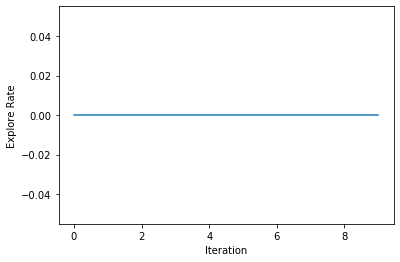

In [26]:
first_test = get_best_explore(0, 10, 0.1)

### Second test gets explore rate from 0 to 20 in steps of 2 (Result of 0.0)

iteration: 0
Explore Rate: 0.0 Time: 8.221595500000149
Explore Rate: 2.0 Time: 13.481223800000407
Explore Rate: 4.0 Time: 14.086840400000256
Explore Rate: 6.0 Time: 13.974823699999433
Explore Rate: 8.0 Time: 13.525346899999931
Explore Rate: 10.0 Time: 13.967731900000217
Explore Rate: 12.0 Time: 12.858962100000099
Explore Rate: 14.0 Time: 14.404848899999706
Explore Rate: 16.0 Time: 12.847818700000062
Explore Rate: 18.0 Time: 12.952819900000577
Explore Rate: 20.0 Time: 17.63283280000087
Explore Rate: 0.0
Time: 8.221595500000149

iteration: 1
Explore Rate: 0.0 Time: 20.63365909999993
Explore Rate: 2.0 Time: 36.46683170000051
Explore Rate: 4.0 Time: 36.335222699999576
Explore Rate: 6.0 Time: 36.06247219999932
Explore Rate: 8.0 Time: 35.70986809999977
Explore Rate: 10.0 Time: 36.97110320000047
Explore Rate: 12.0 Time: 37.08831689999988
Explore Rate: 14.0 Time: 36.111609800000224
Explore Rate: 16.0 Time: 36.23361660000046
Explore Rate: 18.0 Time: 35.89687119999962
Explore Rate: 20.0 Time: 36

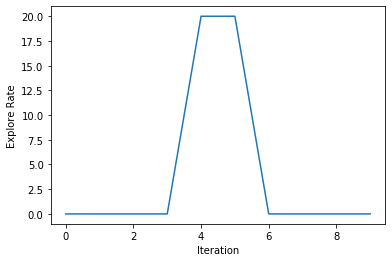

In [31]:
second_test = get_best_explore(0,21,1,2)

### Third test gets explore rate from 0 to 1 in steps of 0.1 (Result of 0.3)

iteration: 0
Explore Rate: 0.0 Time: 7.036127299998043
Explore Rate: 0.1 Time: 6.136677700000291
Explore Rate: 0.2 Time: 5.834471999998641
Explore Rate: 0.3 Time: 6.112866399998893
Explore Rate: 0.4 Time: 6.660913699997764
Explore Rate: 0.5 Time: 7.1370027999982995
Explore Rate: 0.6 Time: 8.194583200001944
Explore Rate: 0.7 Time: 8.943576500001654
Explore Rate: 0.8 Time: 9.980865799996536
Explore Rate: 0.9 Time: 11.155889199999365
Explore Rate: 0.2
Time: 5.834471999998641

iteration: 1
Explore Rate: 0.0 Time: 7.013276900001074
Explore Rate: 0.1 Time: 5.878825499999948
Explore Rate: 0.2 Time: 5.896390500001871
Explore Rate: 0.3 Time: 6.041880700002366
Explore Rate: 0.4 Time: 6.677429700001085
Explore Rate: 0.5 Time: 7.182366400000319
Explore Rate: 0.6 Time: 7.988673399999243
Explore Rate: 0.7 Time: 9.218893699999171
Explore Rate: 0.8 Time: 10.071227200001886
Explore Rate: 0.9 Time: 11.101779399999941
Explore Rate: 0.1
Time: 5.878825499999948

iteration: 2
Explore Rate: 0.0 Time: 7.04445

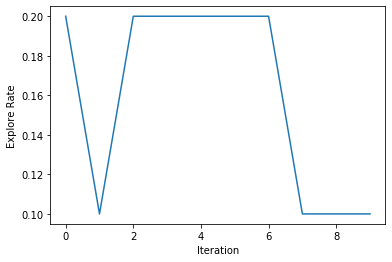

In [ ]:
third_test = get_best_explore(0,10, 10)

## Conclusion: Best Explore Rate = 0.3

## Population Tests, cannot be 0, must be integer value > 1

In [16]:
def test_population(range_start, range_end, range_steps = 1):
    best_explore_rate = 100000
    best_time = 100.00
    for current_population in range(range_start, range_end, range_steps):
        pars.number_in_population = current_population
        current_time = test_genetic(100, prob, pars, 0.00001)
        if(current_time < best_time):
            best_population = current_population
            best_time = current_time
        print("Population: {} Time: {}".format(current_population, current_time))
        pars.number_in_population = 50
    return best_population, best_time

In [17]:
def get_best_population(range_start, range_end, range_steps = 1, number_of_iterations = 10):
    times_for_population = []
    populations = []
    for i in range(number_of_iterations):
        print("iteration: {}".format(i))
        current_population, current_time = test_population(range_start, range_end, range_steps)
        populations.append(current_population)
        times_for_population.append(current_time)
        print("Population: {}".format(current_population))
        print("Time: {}".format(times_for_population[i]))
        print()
    plt.plot(populations)
    plt.xlabel("Iteration")
    plt.ylabel("Population")

### First Test gets population from 100 to 1000 in steps of 100 (Result of 100 ) 

iteration: 0
Population: 100 Time: 9.585742900000014
Population: 200 Time: 12.404256399999895
Population: 300 Time: 12.252303400000073
Population: 400 Time: 13.178210099999887
Population: 500 Time: 12.656283999999914
Population: 600 Time: 12.768316799999866
Population: 700 Time: 12.970415600000024
Population: 800 Time: 13.870706700000028
Population: 900 Time: 13.371176000000105
Population: 100
Time: 9.585742900000014

iteration: 1
Population: 100 Time: 9.509066800000028
Population: 200 Time: 12.032618299999967
Population: 300 Time: 12.338517300000149
Population: 400 Time: 12.73005030000013
Population: 500 Time: 12.751854799999819
Population: 600 Time: 13.397790100000066
Population: 700 Time: 12.941156600000113
Population: 800 Time: 13.28510180000012
Population: 900 Time: 13.478211999999985
Population: 100
Time: 9.509066800000028

iteration: 2
Population: 100 Time: 9.392400200000111
Population: 200 Time: 12.064032300000008
Population: 300 Time: 12.519792899999857
Population: 400 Time: 1

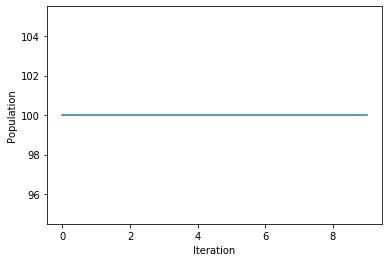

In [27]:
first_test = get_best_population(100,1000, 100)

### Second Test gets population from 10 to 100 in steps of 10 (Result of 10)

iteration: 0
Population: 10 Time: 5.317914400000518
Population: 20 Time: 6.248017899999468
Population: 30 Time: 7.106379599999855
Population: 40 Time: 7.0371783000000505
Population: 50 Time: 7.428452000000107
Population: 60 Time: 7.594057499999508
Population: 70 Time: 8.685433900000135
Population: 80 Time: 8.479000399999677
Population: 90 Time: 9.516931500000283
Population: 10
Time: 5.317914400000518

iteration: 1
Population: 10 Time: 5.3227613000008205
Population: 20 Time: 4.906707899999674
Population: 30 Time: 4.988746500000161
Population: 40 Time: 6.027101700000458
Population: 50 Time: 6.699962599999708
Population: 60 Time: 8.131558599999153
Population: 70 Time: 7.647717799999555
Population: 80 Time: 9.219395600000098
Population: 90 Time: 10.124550999999883
Population: 20
Time: 4.906707899999674

iteration: 2
Population: 10 Time: 5.622268800000711
Population: 20 Time: 4.474823699999433
Population: 30 Time: 5.386295799999971
Population: 40 Time: 5.5437924000007115
Population: 50 Time

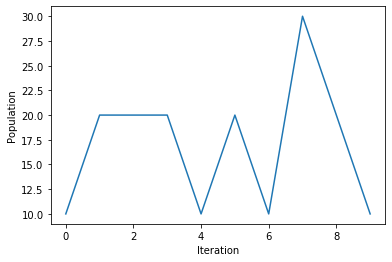

In [30]:
second_test = get_best_population(10, 100, 10)

### Third Test gets population from 2 to 30 in steps of 1

iteration: 0
Population: 10 Time: 4.287945199997921
Population: 11 Time: 4.931147699997382
Population: 12 Time: 4.260422800001834
Population: 13 Time: 4.482113800000661
Population: 14 Time: 4.9957623000009335
Population: 15 Time: 4.345569900000555
Population: 16 Time: 4.395883000001049
Population: 17 Time: 4.517255999999179
Population: 18 Time: 4.3834798999996565
Population: 19 Time: 4.380456900002173
Population: 20 Time: 4.7178663999984565
Population: 21 Time: 4.5925386999988405
Population: 22 Time: 4.579178400003002
Population: 23 Time: 4.361238000001322
Population: 24 Time: 4.813335499999084
Population: 25 Time: 4.806471800002328
Population: 26 Time: 4.844445800001267
Population: 27 Time: 4.933899100000417
Population: 28 Time: 4.996334900002694
Population: 29 Time: 4.878921600000467
Population: 12
Time: 4.260422800001834

iteration: 1
Population: 10 Time: 4.659405899998092
Population: 11 Time: 4.7893199999998615
Population: 12 Time: 4.741624799997226
Population: 13 Time: 4.313050999

Population: 28 Time: 4.668147600001248
Population: 29 Time: 5.290794299999106
Population: 22
Time: 4.32385240000076



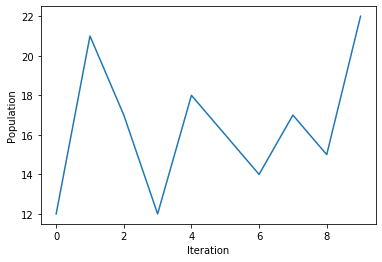

In [41]:
third_test = get_best_population(10,30)

## Conclusion:

## Child rate Tests

In [18]:
def test_child_rate(range_start, range_end, child_rate_range = 1, range_steps = 1):
    best_child_rate = 100000
    best_time = 100.00
    for i in range(range_start, range_end, range_steps):
        current_child_rate = float(i)/float(child_rate_range)
        pars.child_rate = current_child_rate
        current_time = test_genetic(100, prob, pars, 0.00001)
        if(current_time < best_time):
            best_child_rate = current_child_rate
            best_time = current_time
        print("Child Rate: {} Time: {}".format(current_child_rate, current_time))
        pars.child_rate = 1
    return best_child_rate, best_time

In [19]:
def get_best_child_rate(range_start, range_end, child_rate_range = 1, range_steps = 1, number_of_iterations = 10):
    times_for_child_rate = []
    child_rates = []
    for i in range(number_of_iterations):
        print("iteration: {}".format(i))
        current_child_rate, current_time = test_child_rate(range_start, range_end, child_rate_range, range_steps)
        child_rates.append(current_child_rate)
        times_for_child_rate.append(current_time)
        print("Child Rate: {}".format(current_child_rate))
        print("Time: {}".format(times_for_child_rate[i]))
        print()
    plt.plot(child_rates)
    plt.xlabel("Iteration")
    plt.ylabel("Child Rate")

### First Test

iteration: 0
Child Rate: 10.0 Time: 7.574845500000265
Child Rate: 20.0 Time: 7.527779699999883
Child Rate: 30.0 Time: 7.914299000000028
Child Rate: 40.0 Time: 7.751122200000282
Child Rate: 50.0 Time: 7.577419400000053
Child Rate: 60.0 Time: 7.660541899999771
Child Rate: 70.0 Time: 7.955052400000113
Child Rate: 80.0 Time: 7.5814548000003015
Child Rate: 90.0 Time: 6.6606737000001885
Child Rate: 90.0
Time: 6.6606737000001885

iteration: 1
Child Rate: 10.0 Time: 7.441990700000133
Child Rate: 20.0 Time: 7.835168799999792
Child Rate: 30.0 Time: 7.783784100000048
Child Rate: 40.0 Time: 7.655427099999997
Child Rate: 50.0 Time: 7.814549299999726
Child Rate: 60.0 Time: 7.761468999999579
Child Rate: 70.0 Time: 7.789451699999972
Child Rate: 80.0 Time: 7.66078460000017
Child Rate: 90.0 Time: 7.323847199999818
Child Rate: 90.0
Time: 7.323847199999818

iteration: 2
Child Rate: 10.0 Time: 7.83351360000006
Child Rate: 20.0 Time: 7.573557199999868
Child Rate: 30.0 Time: 8.069950699999936
Child Rate: 40.

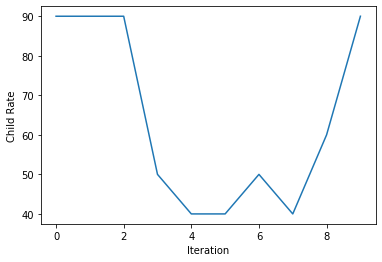

In [28]:
first_test = get_best_child_rate(1,10, 0.1)

### Second Test

iteration: 0
Child Rate: 1.0 Time: 7.266096199999993
Child Rate: 2.0 Time: 6.997880700000223
Child Rate: 3.0 Time: 6.790218199999799
Child Rate: 4.0 Time: 7.183240899999873
Child Rate: 5.0 Time: 6.635682399999951
Child Rate: 6.0 Time: 6.9192213000001175
Child Rate: 7.0 Time: 6.435471400000097
Child Rate: 8.0 Time: 6.5977444999998625
Child Rate: 9.0 Time: 7.1873224999999366
Child Rate: 7.0
Time: 6.435471400000097

iteration: 1
Child Rate: 1.0 Time: 7.733312399999704
Child Rate: 2.0 Time: 7.618952999999692
Child Rate: 3.0 Time: 7.660239000000274
Child Rate: 4.0 Time: 7.655790799999977
Child Rate: 5.0 Time: 7.58296879999989
Child Rate: 6.0 Time: 7.6799393999999666
Child Rate: 7.0 Time: 7.640820499999791
Child Rate: 8.0 Time: 7.633060999999998
Child Rate: 9.0 Time: 7.224475999999868
Child Rate: 9.0
Time: 7.224475999999868

iteration: 2
Child Rate: 1.0 Time: 7.150773000000299
Child Rate: 2.0 Time: 7.980280900000253
Child Rate: 3.0 Time: 7.650727799999913
Child Rate: 4.0 Time: 7.783738500000

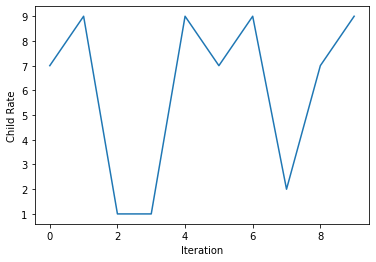

In [29]:
second_test = get_best_child_rate(1,10)

### Third Test

iteration: 0
Child Rate: 9.0 Time: 7.3678992000004655
Child Rate: 9.1 Time: 7.477871999999479
Child Rate: 9.2 Time: 7.35698020000018
Child Rate: 9.3 Time: 7.304908300000534
Child Rate: 9.4 Time: 7.272105199999714
Child Rate: 9.5 Time: 7.540665999998964
Child Rate: 9.6 Time: 7.534488899998905
Child Rate: 9.7 Time: 7.452826400000049
Child Rate: 9.8 Time: 7.369841600000655
Child Rate: 9.9 Time: 7.387623399999939
Child Rate: 9.4
Time: 7.272105199999714

iteration: 1
Child Rate: 9.0 Time: 7.702792499998395
Child Rate: 9.1 Time: 7.477751599999465
Child Rate: 9.2 Time: 7.656723000000056
Child Rate: 9.3 Time: 7.560905399999683
Child Rate: 9.4 Time: 7.514166099999784
Child Rate: 9.5 Time: 7.6501604999994015
Child Rate: 9.6 Time: 7.632367799998974
Child Rate: 9.7 Time: 7.621661299999687
Child Rate: 9.8 Time: 7.527954600000157
Child Rate: 9.9 Time: 7.457476999999926
Child Rate: 9.9
Time: 7.457476999999926

iteration: 2
Child Rate: 9.0 Time: 7.155996600000435
Child Rate: 9.1 Time: 7.51563299999907

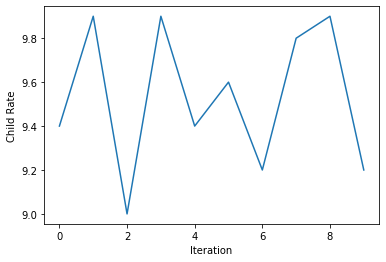

In [34]:
third_test = get_best_child_rate(90,100, 10)

## Conclusion:

## Number of iteration tests, cannot be 0, must be integer

In [20]:
def test_number_of_iterations(range_start, range_end, range_steps = 1):
    best_number_of_iterations = 100000
    best_time = 100.00
    for current_number_of_iterations in range(range_start, range_end, range_steps):
        pars.number_of_iterations = current_number_of_iterations
        current_time = test_genetic(100, prob, pars, 0.00001)
        if(current_time < best_time):
            best_number_of_iterations = current_number_of_iterations
            best_time = current_time
        print("Number of Iterations: {} Time: {}".format(current_number_of_iterations, current_time))
        pars.number_of_iterations = 100
    return best_number_of_iterations, best_time

In [21]:
def get_best_number_of_iterations(range_start, range_end, range_steps = 1, iteration_count = 10):
    times_for_number_of_iterations = []
    numbers_of_iterations = []
    for i in range(iteration_count):
        print("iteration: {}".format(i))
        current_number_of_iterations, current_time = test_number_of_iterations(range_start, range_end, range_steps)
        numbers_of_iterations.append(current_number_of_iterations)
        times_for_number_of_iterations.append(current_time)
        print("Number of Iterations: {}".format(current_number_of_iterations))
        print("Time: {}".format(times_for_number_of_iterations[i]))
        print()
    plt.plot(numbers_of_iterations)
    plt.xlabel("Iteration")
    plt.ylabel("Number of Iterations")

### First Test

iteration: 0
Number of Iterations: 100 Time: 6.192024200000105
Number of Iterations: 200 Time: 6.192565299999842
Number of Iterations: 300 Time: 5.902285799999845
Number of Iterations: 400 Time: 6.1357561999998325
Number of Iterations: 500 Time: 6.071491600000172
Number of Iterations: 600 Time: 6.119743699999617
Number of Iterations: 700 Time: 6.015687399999933
Number of Iterations: 800 Time: 5.935859700000037
Number of Iterations: 900 Time: 6.076562900000226
Number of Iterations: 300
Time: 5.902285799999845

iteration: 1
Number of Iterations: 100 Time: 5.907801500000005
Number of Iterations: 200 Time: 5.969728600000053
Number of Iterations: 300 Time: 5.977787899999839
Number of Iterations: 400 Time: 6.087138200000027
Number of Iterations: 500 Time: 5.846328500000254
Number of Iterations: 600 Time: 5.926853899999969
Number of Iterations: 700 Time: 5.881359099999827
Number of Iterations: 800 Time: 5.838889199999812
Number of Iterations: 900 Time: 5.886882399999649
Number of Iterations: 

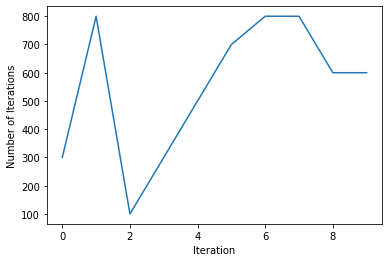

In [29]:
first_test = get_best_number_of_iterations(100,1000, 100)

### Second Test

iteration: 0
Number of Iterations: 10 Time: 1.5061837000002924
Number of Iterations: 20 Time: 2.9664543000003505
Number of Iterations: 30 Time: 4.4745646999999735
Number of Iterations: 40 Time: 6.004366000000118
Number of Iterations: 50 Time: 7.150255399999878
Number of Iterations: 60 Time: 7.633379700000205
Number of Iterations: 70 Time: 7.604263100000026
Number of Iterations: 80 Time: 7.44971570000007
Number of Iterations: 90 Time: 7.566973099999814
Number of Iterations: 10
Time: 1.5061837000002924

iteration: 1
Number of Iterations: 10 Time: 1.4988727999998446
Number of Iterations: 20 Time: 2.9660134000000653
Number of Iterations: 30 Time: 4.458173600000009
Number of Iterations: 40 Time: 5.931167400000049
Number of Iterations: 50 Time: 7.129002600000149
Number of Iterations: 60 Time: 7.397883799999818
Number of Iterations: 70 Time: 7.518569200000002
Number of Iterations: 80 Time: 7.372438699999748
Number of Iterations: 90 Time: 7.552739199999905
Number of Iterations: 10
Time: 1.4988

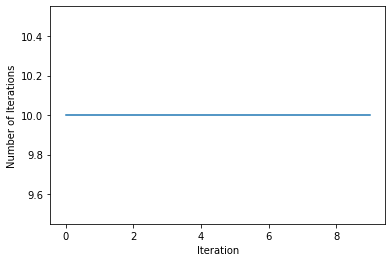

In [28]:
second_test = get_best_number_of_iterations(10,100, 10)

### Third Test

iteration: 0
Number of Iterations: 60 Time: 6.034905399999843
Number of Iterations: 70 Time: 6.271189299999605
Number of Iterations: 80 Time: 6.11165389999951
Number of Iterations: 90 Time: 6.093456700000388
Number of Iterations: 60
Time: 6.034905399999843

iteration: 1
Number of Iterations: 60 Time: 6.07599669999945
Number of Iterations: 70 Time: 6.088575699999637
Number of Iterations: 80 Time: 6.156694100000095
Number of Iterations: 90 Time: 6.098985900000116
Number of Iterations: 60
Time: 6.07599669999945

iteration: 2
Number of Iterations: 60 Time: 5.985922099998788
Number of Iterations: 70 Time: 6.216977100000804
Number of Iterations: 80 Time: 6.09096640000098
Number of Iterations: 90 Time: 6.122954000000391
Number of Iterations: 60
Time: 5.985922099998788

iteration: 3
Number of Iterations: 60 Time: 6.037576799999442
Number of Iterations: 70 Time: 6.044152000000395
Number of Iterations: 80 Time: 6.078834799998731
Number of Iterations: 90 Time: 6.2425844999997935
Number of Iterati

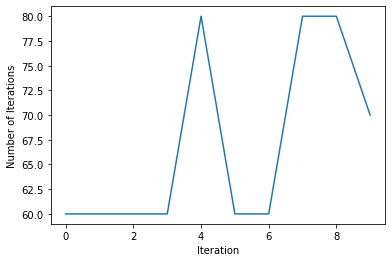

In [35]:
third_test = get_best_number_of_iterations(60,100, 10)

## Conclusion: 60 is best number of iterations

## Mutation rate tests

In [22]:
def test_mutation_rate(range_start, range_end, mutation_rate_range = 1, range_steps = 1):
    best_mutation_rate = 100000
    best_time = 100.00
    for i in range(range_start, range_end, range_steps):
        current_mutation_rate = float(i)/float(mutation_rate_range)
        pars.mutation_rate = current_mutation_rate
        current_time = test_genetic(100, prob, pars, 0.00001)
        if(current_time < best_time):
            best_mutation_rate = current_mutation_rate
            best_time = current_time
        print("Mutation Rate: {} Time: {}".format(current_mutation_rate, current_time))
        pars.mutation_rate = 0.2
    return best_mutation_rate, best_time

In [23]:
def get_best_mutation_rate(range_start, range_end, mutation_rate_range = 1, range_steps = 1, number_of_iterations = 10):
    times_for_mutation_rate = []
    mutation_rates = []
    for i in range(number_of_iterations):
        print("iteration: {}".format(i))
        current_mutation_rate, current_time = test_mutation_rate(range_start, range_end, mutation_rate_range, range_steps)
        mutation_rates.append(current_mutation_rate)
        times_for_mutation_rate.append(current_time)
        print("Mutation Rate: {}".format(current_mutation_rate))
        print("Time: {}".format(times_for_mutation_rate[i]))
        print()
    plt.plot(mutation_rates)
    plt.xlabel("Iteration")
    plt.ylabel("Mutation Rate")

### First Test

iteration: 0
Mutation Rate: 10.0 Time: 13.542152100000294
Mutation Rate: 20.0 Time: 13.254894799999875
Mutation Rate: 30.0 Time: 13.751210299999912
Mutation Rate: 40.0 Time: 13.312238399999842
Mutation Rate: 50.0 Time: 13.466337899999871
Mutation Rate: 60.0 Time: 13.697093700000096
Mutation Rate: 70.0 Time: 13.60066259999985
Mutation Rate: 80.0 Time: 13.215053299999909
Mutation Rate: 90.0 Time: 13.490400600000157
Mutation Rate: 80.0
Time: 13.215053299999909

iteration: 1
Mutation Rate: 10.0 Time: 13.80501460000005
Mutation Rate: 20.0 Time: 13.39980629999991
Mutation Rate: 30.0 Time: 13.611013400000047
Mutation Rate: 40.0 Time: 13.213592900000094
Mutation Rate: 50.0 Time: 13.261093900000105
Mutation Rate: 60.0 Time: 13.215240399999857
Mutation Rate: 70.0 Time: 13.16095919999998
Mutation Rate: 80.0 Time: 13.426108399999976
Mutation Rate: 90.0 Time: 13.232533200000034
Mutation Rate: 70.0
Time: 13.16095919999998

iteration: 2
Mutation Rate: 10.0 Time: 13.546505799999977
Mutation Rate: 20.0

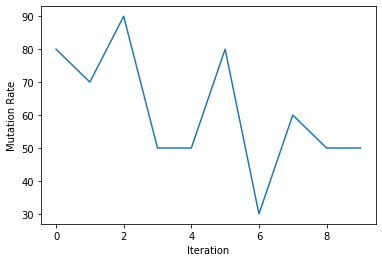

In [30]:
first_test = get_best_mutation_rate(1,10, 0.1)

### Second Test

iteration: 0
Mutation Rate: 1.0 Time: 13.716769500002556
Mutation Rate: 2.0 Time: 13.51120340000125
Mutation Rate: 3.0 Time: 13.72661970000263
Mutation Rate: 4.0 Time: 13.589512200000172
Mutation Rate: 5.0 Time: 13.815999899998133
Mutation Rate: 6.0 Time: 13.616269699999975
Mutation Rate: 7.0 Time: 13.689997100002074
Mutation Rate: 8.0 Time: 13.64507980000053
Mutation Rate: 9.0 Time: 13.779192499998317
Mutation Rate: 2.0
Time: 13.51120340000125

iteration: 1
Mutation Rate: 1.0 Time: 13.74849600000016
Mutation Rate: 2.0 Time: 13.717432800000097
Mutation Rate: 3.0 Time: 13.649738299998717
Mutation Rate: 4.0 Time: 13.620212300000276
Mutation Rate: 5.0 Time: 13.75830340000175
Mutation Rate: 6.0 Time: 13.633069699997577
Mutation Rate: 7.0 Time: 13.667315700000472
Mutation Rate: 8.0 Time: 13.644173900000169
Mutation Rate: 9.0 Time: 13.655498299998726
Mutation Rate: 4.0
Time: 13.620212300000276

iteration: 2
Mutation Rate: 1.0 Time: 13.638576500001363
Mutation Rate: 2.0 Time: 13.7185112999977

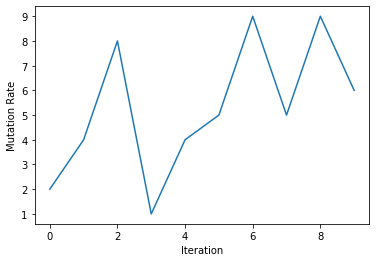

In [39]:
second_test = get_best_mutation_rate(1,10)

### Third Test

iteration: 0
Mutation Rate: 0.1 Time: 5.2675674999991315
Mutation Rate: 0.2 Time: 6.411796999998842
Mutation Rate: 0.3 Time: 9.028084600000511
Mutation Rate: 0.4 Time: 12.76885829999992
Mutation Rate: 0.5 Time: 13.281130200000916
Mutation Rate: 0.6 Time: 13.417405700000018
Mutation Rate: 0.7 Time: 13.833878400000685
Mutation Rate: 0.8 Time: 14.089091000001645
Mutation Rate: 0.9 Time: 14.085094099998969
Mutation Rate: 0.1
Time: 5.2675674999991315

iteration: 1
Mutation Rate: 0.1 Time: 4.87673519999953
Mutation Rate: 0.2 Time: 6.247135800000251
Mutation Rate: 0.3 Time: 8.490064199999324
Mutation Rate: 0.4 Time: 12.447327300000325
Mutation Rate: 0.5 Time: 12.726655900001788
Mutation Rate: 0.6 Time: 12.750769000002038
Mutation Rate: 0.7 Time: 13.20388180000009
Mutation Rate: 0.8 Time: 13.259168100001261
Mutation Rate: 0.9 Time: 13.472478100000444
Mutation Rate: 0.1
Time: 4.87673519999953

iteration: 2
Mutation Rate: 0.1 Time: 5.012154100000771
Mutation Rate: 0.2 Time: 6.108820600002218
Mut

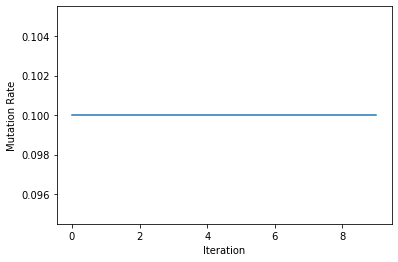

In [37]:
first_test = get_best_mutation_rate(1,10, 10)

## Conclusion: 0.1 is best mutation rate

## Mutation range tests

In [24]:
def test_mutation_range(range_start, range_end, mutation_range_range = 1, range_steps = 1):
    best_mutation_range = 100000
    best_time = 100.00
    for i in range(range_start, range_end, range_steps):
        current_mutation_range = float(i)/float(mutation_range_range)
        pars.mutation_range = current_mutation_range
        current_time = test_genetic(100, prob, pars, 0.00001)
        if(current_time < best_time):
            best_mutation_range = current_mutation_range
            best_time = current_time
        print("Mutation Range: {} Time: {}".format(current_mutation_range, current_time))
        pars.mutation_range = 0.2
    return best_mutation_range, best_time

In [25]:
def get_best_mutation_range(range_start, range_end, mutation_range_range = 1, range_steps = 1, number_of_iterations = 10):
    times_for_mutation_range = []
    mutation_ranges = []
    for i in range(number_of_iterations):
        print("iteration: {}".format(i))
        current_mutation_range, current_time = test_mutation_range(range_start, range_end, mutation_range_range, range_steps)
        mutation_ranges.append(current_mutation_range)
        times_for_mutation_range.append(current_time)
        print("Mutation Range: {}".format(current_mutation_range))
        print("Time: {}".format(times_for_mutation_range[i]))
        print()
    plt.plot(mutation_ranges)
    plt.xlabel("Iteration")
    plt.ylabel("Mutation Range")

### First Test

iteration: 0
Mutation Range: 10.0 Time: 10.218915100000231
Mutation Range: 20.0 Time: 10.424966599999607
Mutation Range: 30.0 Time: 10.301428499999929
Mutation Range: 40.0 Time: 10.57911310000054
Mutation Range: 50.0 Time: 10.571249399999942
Mutation Range: 60.0 Time: 10.77246920000016
Mutation Range: 70.0 Time: 10.747152999999344
Mutation Range: 80.0 Time: 10.617150399999446
Mutation Range: 90.0 Time: 10.796705499999916
Mutation Range: 10.0
Time: 10.218915100000231

iteration: 1
Mutation Range: 10.0 Time: 10.116362199999458
Mutation Range: 20.0 Time: 10.485207399999126
Mutation Range: 30.0 Time: 10.611091500000839
Mutation Range: 40.0 Time: 10.65714239999943
Mutation Range: 50.0 Time: 10.560122099999717
Mutation Range: 60.0 Time: 11.466710200000307
Mutation Range: 70.0 Time: 12.265867400000388
Mutation Range: 80.0 Time: 11.848898199999894
Mutation Range: 90.0 Time: 12.035795900000267
Mutation Range: 10.0
Time: 10.116362199999458

iteration: 2
Mutation Range: 10.0 Time: 11.390204999999

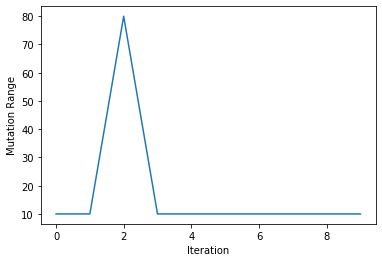

In [31]:
first_test = get_best_mutation_range(1,10, 0.1)

### Second Test

iteration: 0
Mutation Range: 1.0 Time: 7.729490099999964
Mutation Range: 2.0 Time: 8.735592499999996
Mutation Range: 3.0 Time: 9.058697299999949
Mutation Range: 4.0 Time: 9.547829800000045
Mutation Range: 5.0 Time: 9.70826939999995
Mutation Range: 6.0 Time: 10.004094499999951
Mutation Range: 7.0 Time: 10.362437600000021
Mutation Range: 8.0 Time: 10.835273099999995
Mutation Range: 9.0 Time: 10.580950600000051
Mutation Range: 1.0
Time: 7.729490099999964

iteration: 1
Mutation Range: 1.0 Time: 8.196403000000032
Mutation Range: 2.0 Time: 9.658001200000058
Mutation Range: 3.0 Time: 10.70437400000003
Mutation Range: 4.0 Time: 11.029571499999975
Mutation Range: 5.0 Time: 11.459213700000078
Mutation Range: 6.0 Time: 11.165923899999939
Mutation Range: 7.0 Time: 11.318911500000013
Mutation Range: 8.0 Time: 11.839345800000046
Mutation Range: 9.0 Time: 11.97446309999998
Mutation Range: 1.0
Time: 8.196403000000032

iteration: 2
Mutation Range: 1.0 Time: 9.227232500000014
Mutation Range: 2.0 Time: 9

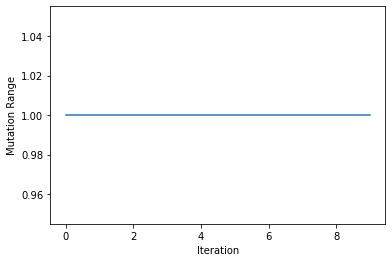

In [26]:
second_test = get_best_mutation_range(1,10)

### Third Test

iteration: 0
Mutation Range: 0.1 Time: 5.690152499999385
Mutation Range: 0.2 Time: 6.391507100001036
Mutation Range: 0.3 Time: 6.687074300003587
Mutation Range: 0.4 Time: 7.157314100000804
Mutation Range: 0.5 Time: 7.206289199999446
Mutation Range: 0.6 Time: 7.9370954999976675
Mutation Range: 0.7 Time: 7.290940300001239
Mutation Range: 0.8 Time: 7.358856700000615
Mutation Range: 0.9 Time: 7.827009000000544
Mutation Range: 0.1
Time: 5.690152499999385

iteration: 1
Mutation Range: 0.1 Time: 5.810976200002187
Mutation Range: 0.2 Time: 6.797533100001601
Mutation Range: 0.3 Time: 6.418084799999633
Mutation Range: 0.4 Time: 7.17945310000141
Mutation Range: 0.5 Time: 7.370569800001249
Mutation Range: 0.6 Time: 7.603525599999557
Mutation Range: 0.7 Time: 7.751483799998823
Mutation Range: 0.8 Time: 7.672316399999545
Mutation Range: 0.9 Time: 8.029854899999918
Mutation Range: 0.1
Time: 5.810976200002187

iteration: 2
Mutation Range: 0.1 Time: 5.918658599999617
Mutation Range: 0.2 Time: 6.3781775

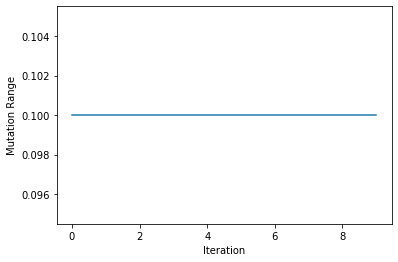

In [38]:
third_test = get_best_mutation_range(1,10, 10)

## Conclusion: 0.1 is best mutation range

In [42]:
final_test = test_genetic(100, prob, pars, 0.00001)

In [25]:
pars.to_String()

'Population: 50  Child Rate: 1  Explore Rate: 0.3  Mutation Rate: 0.2  Mutation Range: 0.2'

In [32]:
pars.to_String()

'Population: 50  Child Rate: 1  Explore Rate: 0.3  Mutation Rate: 0.2  Mutation Range: 0.2'